<a href="https://colab.research.google.com/github/jasonnzhangg2/job-market-analysis-data-analytics-project/blob/main/EDA_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Questions to be Answered

1. What are the most in demand skills for the top 3 most popular Data Roles

2. How are in-demand skills trending for Data Analysts

3. How well do jobs and skills pay for Data Analysts

4. What is the most optimal skill to learn for Data Analysts


In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [2]:
df.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [3]:
print(type(df.job_posted_date[0]))
print(type(df.job_skills[1]))

<class 'str'>
<class 'str'>


##### Data Cleanup

job_posted_date and job_skills are string values

convert job_posted_date to list

In [4]:
# Data Cleanup
# Change job_posted_date to datetime

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

def clean_list(skill_list):
  if pd.notna(skill_list):
    return ast.literal_eval(skill_list)
  else:
    return skill_list

df['job_skills'] = df['job_skills'].apply(clean_list)

Since I am from Canada we will be looking for Data Analyst roles in Canada



In [5]:
df_DA_CAN = df[(df['job_country'] == 'Canada') & (df['job_title_short'] == 'Data Analyst')]

In [6]:
df_DA_CAN.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
81,Data Analyst,Business Data Analyst,"Regina, SK, Canada",via ZipRecruiter,Full-time,False,Canada,2023-03-01 13:28:04,False,False,Canada,None,NaN,NaN,027 Parks Culture and Sport,None,None
118,Data Analyst,"Actuarial and Advanced Analytics, New Grad Rot...",Canada,via BeBee Canada,Full-time,False,Canada,2023-10-31 13:37:11,False,False,Canada,None,NaN,NaN,Definity Financial Corporation,"[python, r, sql, go, bigquery]","{'cloud': ['bigquery'], 'programming': ['pytho..."
225,Data Analyst,"Statistical Healthcare Data Analyst, Policy Re...",Anywhere,via LinkedIn,Full-time,True,Canada,2023-07-07 13:12:09,False,False,Canada,None,NaN,NaN,Policy Reporter,[r],{'programming': ['r']}
638,Data Analyst,Cognitive Data Analyst,Anywhere,via Indeed,Full-time,True,Canada,2023-05-10 13:19:23,False,False,Canada,None,NaN,NaN,Wysdom.AI,"[python, sql]","{'programming': ['python', 'sql']}"
867,Data Analyst,Lead Data Analyst [Remote],Anywhere,via LinkedIn,Full-time,True,Canada,2023-01-23 13:14:40,False,False,Canada,None,NaN,NaN,Talentify.io,"[sql, python, aws, redshift]","{'cloud': ['aws', 'redshift'], 'programming': ..."


### Exploratory Data Analysis

Things to check

1. What are the top 10 job locations in Canada for Data Analysts
2. How many jobs have benefits
3. What are the top 10 job companies in Canada for Data Analysts


In [7]:
# Top 10 job locations
df_DA_CAN.job_location.value_counts().head(10)

,count
job_location,
Canada,1230
Anywhere,496
"Calgary, AB, Canada",152
"Toronto, ON, Canada",93
"Edmonton, AB, Canada",76
"Fort McMurray, AB, Canada",30
"Winnipeg, MB, Canada",30
"Mississauga, ON, Canada",29
"Montreal, QC, Canada",24


While exploring the job_location field

I observed that many postings list the location simply as "Canada" rather than a specific city or province.

These entries lack the geographic detail required for city-level analysis.

To better understand the entries, I compared job_location with the job_work_from_home field

If a posting had:

- job_location = "Canada"
- job_work_from_home = True

it was interpreted as a Canada-wide remote position.

If job_location = "Canada" but the remote flag was False or missing, the location was considered unspecified

In [8]:
df_DA_CAN[(df_DA_CAN['job_location'] == 'Canada') & (df_DA_CAN['job_work_from_home'] == True)].value_counts(dropna=False)

,,,,,,,,,,,,,,,,,count
job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,


A further breakdown shows that there are no remote inidcators for the positions

As such they would be categorized as Location unspecified.

To ensure that the “Top 10 Job Locations” visualization reflects only postings with clearly defined geographic information, rows labeled only as Canada were excluded from that specific analysis.

In [9]:
df_DA_CAN1 = df_DA_CAN[
~((df_DA_CAN['job_location'] == 'Canada') &
  (df_DA_CAN['job_work_from_home'] == False))
]

df_DA_CAN1

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
81,Data Analyst,Business Data Analyst,"Regina, SK, Canada",via ZipRecruiter,Full-time,False,Canada,2023-03-01 13:28:04,False,False,Canada,None,NaN,NaN,027 Parks Culture and Sport,None,None
225,Data Analyst,"Statistical Healthcare Data Analyst, Policy Re...",Anywhere,via LinkedIn,Full-time,True,Canada,2023-07-07 13:12:09,False,False,Canada,None,NaN,NaN,Policy Reporter,[r],{'programming': ['r']}
638,Data Analyst,Cognitive Data Analyst,Anywhere,via Indeed,Full-time,True,Canada,2023-05-10 13:19:23,False,False,Canada,None,NaN,NaN,Wysdom.AI,"[python, sql]","{'programming': ['python', 'sql']}"
867,Data Analyst,Lead Data Analyst [Remote],Anywhere,via LinkedIn,Full-time,True,Canada,2023-01-23 13:14:40,False,False,Canada,None,NaN,NaN,Talentify.io,"[sql, python, aws, redshift]","{'cloud': ['aws', 'redshift'], 'programming': ..."
1736,Data Analyst,Database Analyst,"Toronto, ON, Canada",via BeBee Canada,Full-time,False,Canada,2023-03-11 13:21:18,False,False,Canada,None,NaN,NaN,Ahki,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776842,Data Analyst,Data Analyst,Anywhere,via Startup Jobs,Full-time,True,Canada,2023-01-06 05:37:34,True,False,Canada,None,NaN,NaN,Warp,"[sql, python, r, rust, shell, sheets, terminal]","{'analyst_tools': ['sheets'], 'other': ['termi..."
779065,Data Analyst,"Data Analyst, Faculty Affairs","Calgary, AB, Canada",via LinkedIn,Full-time and Temp work,False,Canada,2023-11-15 05:11:39,False,False,Canada,None,NaN,NaN,University of Calgary,"[python, r, sql, html, word, outlook, powerpoi...","{'analyst_tools': ['word', 'outlook', 'powerpo..."
779542,Data Analyst,Data Analyst- Supply Chain,"Calgary, AB, Canada",via BeBee Canada,Full-time,False,Canada,2023-04-26 05:13:57,True,False,Canada,None,NaN,NaN,Adecco,"[r, sas, sas]","{'analyst_tools': ['sas'], 'programming': ['r'..."
781094,Data Analyst,Power BI Engineer,"Vancouver, BC, Canada",via BeBee Canada,Contractor,False,Canada,2023-01-15 06:16:23,False,False,Canada,None,NaN,NaN,Randstad Canada,"[r, python, t-sql, sql, azure, databricks, pow...","{'analyst_tools': ['power bi', 'excel'], 'clou..."


Plot out the job locations on a horizontal bar plot

Text(0, 0.5, '')

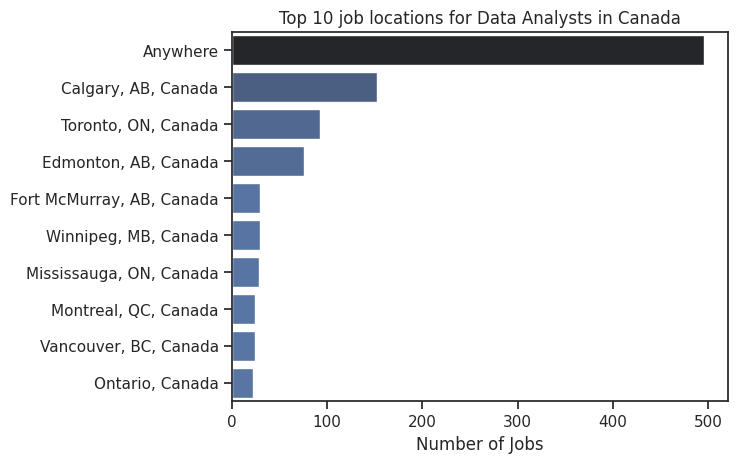

In [10]:
df_plot = df_DA_CAN1.job_location.value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.despine()

sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend = False)

plt.title('Top 10 job locations for Data Analysts in Canada')
plt.xlabel('Number of Jobs')
plt.ylabel('')



### Benefits Analysis for Data Analyst Jobs

Plot the number of jobs
- have work from home
- has health insurance


In [11]:
df_DA_CAN1[['job_health_insurance', 'job_work_from_home']].value_counts()

job_health_insurance  job_work_from_home
False                 False                 638
                      True                  496
True                  False                   1
Name: count, dtype: int64

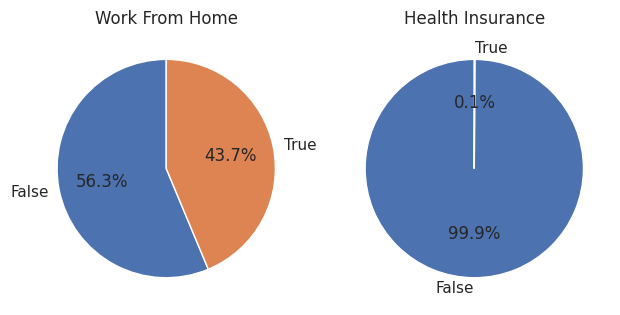

In [12]:
fig, ax = plt.subplots(1, 2)


dic_column = {
    'job_work_from_home' : 'Work From Home',
    'job_health_insurance' : 'Health Insurance'
}

# Loop through to get the column and Title
# enumerate is used to plot the subplots
for i, (column, title) in enumerate(dic_column.items()):
  ax[i].pie(df_DA_CAN1[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
  ax[i].set_title(title)

plt.tight_layout()
plt.show()

### Number of Companies Hiring

Text(0, 0.5, '')

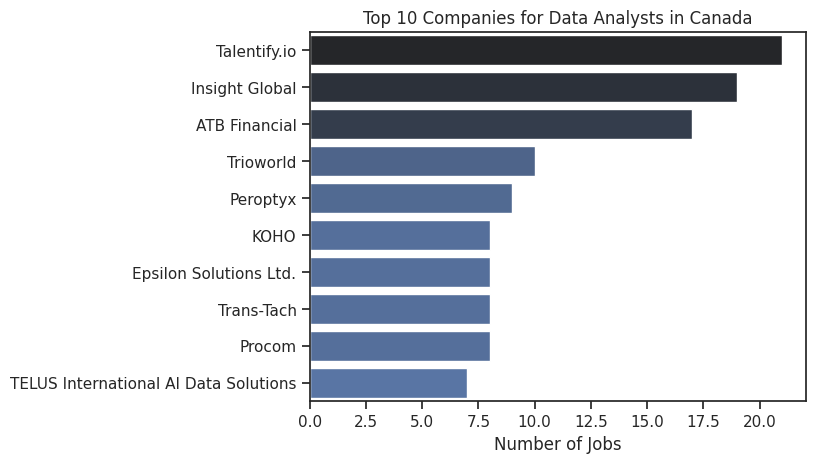

In [13]:
df_plot = df_DA_CAN1.company_name.value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.despine()

sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend = False)

plt.title('Top 10 Companies for Data Analysts in Canada')
plt.xlabel('Number of Jobs')
plt.ylabel('')


